<a href="https://colab.research.google.com/github/vonvolous/python_AI_lecture/blob/main/lecture_code/DL003_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. PyTorch Basic**

## 1-1. 기본 모듈 임포트

In [1]:
import numpy as np
import torch

## 1-2. GPU 설정하기

In [3]:
# torch.cuda.is_available()를 통해 현재 시스템의 상태를 인식, 지정하면 GPU또는 CPU를 상황에 맞게 적용할 수 있다.
# device='cuda' 또는 device='cuda:0'와 같은 방법으로 직접 지정할 수 있다. (0: GPU의 Index)

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print(DEVICE)

cuda


## 1-3. 기본 데이터형(텐서) 사용하기

In [4]:
# 중첩 list를 지정

t = torch.tensor([[1,2],[3,4.]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [5]:
# device를 지정하면 GPU로 Tensor를 만들 수 있다

t = torch.tensor([[1,2],[3,4.]], device = 'cuda')
print(t)

tensor([[1., 2.],
        [3., 4.]], device='cuda:0')


In [6]:
# dtype을 사용해 데이터형을 지정해 Tensor를 만들 수 있다

t = torch.tensor([[1, 2], [3, 4.]], dtype=torch.float64)
print(t)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [7]:
# 0부터 9까지의 수치로 초기화된 1차원 Tensor

t = torch.arange(0, 10)
print(t)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [8]:
#모든 값이 0인 100 x 10 의 Tensor를 작성해서 to메서드로 GPU에 전송

if DEVICE == 'cuda':
    t = torch.zeros(100, 10).to("cuda:0")
else:
    t = torch.zeros(100, 10)

print(t)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [9]:
# 정규 난수로 100 x 10의 Tensor를 작성
t = torch.randn(100, 10)
print(t)

tensor([[-6.6974e-01,  5.3946e-01,  1.5556e-02,  1.3819e+00, -1.3611e-01,
          7.3760e-01,  1.5778e+00,  5.4592e-02,  1.3055e+00, -1.5067e+00],
        [-6.7369e-01,  8.5096e-01, -7.9567e-01, -2.1322e-01, -3.5904e-02,
          1.7893e-01, -2.0226e-01,  1.4485e+00, -8.8923e-01, -4.9803e-01],
        [ 1.7453e+00,  2.4126e-01,  1.3131e+00,  2.6571e-01, -1.4119e+00,
         -2.0555e+00,  2.1024e-01,  6.2390e-01, -8.0416e-01, -1.0790e+00],
        [ 6.4847e-01, -1.9317e+00,  9.9000e-01,  1.3799e-01, -1.4314e+00,
          6.3272e-01, -2.2280e-01,  3.2254e-01, -1.0288e-01, -5.7085e-01],
        [-7.8037e-01,  2.0256e-01,  2.6871e-01,  1.7578e+00,  1.0114e-01,
         -5.8413e-01,  8.4220e-01,  1.0503e+00,  1.2562e-01, -5.2537e-01],
        [-1.4865e+00,  1.0821e+00, -1.1446e+00, -3.1159e-02,  2.2122e-01,
          2.6342e-01, -1.4133e+00,  9.1089e-01,  1.2630e+00, -1.9046e-01],
        [-1.4839e+00, -1.2991e-01, -1.2046e+00, -1.3887e+00,  1.5930e-01,
         -5.5328e-01, -7.5593e-0

In [10]:
# Tensor의 shape은 size 메서드로 취득 가능
t.size()

torch.Size([100, 10])

In [11]:
# numpy 메서드를 사용해 ndarray로 변환
t = torch.tensor([[1, 2], [3, 4.]])

x = t.numpy()
x

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [12]:
# GPU上상의 Tensor는
t = torch.tensor([[1,2],[3,4.]], device = "cuda:0")


# cpu메서드로,CPU의 Tensor로 이동(변환)할 필요가 있다
x = t.to("cpu").numpy()
x

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [13]:
t = torch.tensor([[1,2,3], [4,5,6.]])

# 스칼라 첨자 지정
print(t[0, 2])

# 슬라이스로 지정
print(t[:, :2])

# 리스트로 지정
print(t[:, [1,2]])

# 마스크 배열을 시용해서 3보다 큰 부분만 선택
print(t[t > 3])

tensor(3.)
tensor([[1., 2.],
        [4., 5.]])
tensor([[2., 3.],
        [5., 6.]])
tensor([4., 5., 6.])


In [14]:
# [0, 1]의 요소를 100으로 설정
t[0, 1] = 100
print(t)

# 슬라이스를 사용한 일괄 대입
t[:, 1] = 200
print(t)

# 마스크 배열을 사용해서 특정 조건의 요소만 치환
t[t > 10] = 20
print(t)

tensor([[  1., 100.,   3.],
        [  4.,   5.,   6.]])
tensor([[  1., 200.,   3.],
        [  4., 200.,   6.]])
tensor([[ 1., 20.,  3.],
        [ 4., 20.,  6.]])


In [15]:
# 길이 3인 벡터
v = torch.tensor([1, 2, 3.])
w = torch.tensor([0, 10, 20.])
print('v=', v)
print('w=', w)
print('----------------------------------------------')

# 2 × 3의 행렬
m = torch.tensor([[0, 1, 2], [100, 200, 300.]])
print('m=', m)
print('----------------------------------------------')

# 벡터와 스칼라의 덧셈
v2 = v + 10
print('v2=', v2)

# 자승도 같은 방식
v2 = v ** 2
print('v2=', v2)

# 동일 길이의 벡터 간 뺄쎔
z = v - w
print('z=', z)

# 여러 가지 조합
u = 2 * v - w / 10 + 6.0
print('u=', u)
print('----------------------------------------------')

# 행렬과 스칼라
m2 = m * 2.0
print('m2=', m2)
# 행렬과 벡터
#(2, 3)인 행렬과 (3,)인 벡터이므로 브로드 캐스트가 작동
m3 = m + v
print('m3=', m3)
# 행렬 간 처리
m4 = m + m
print('m4=', m4)
print('----------------------------------------------')


v= tensor([1., 2., 3.])
w= tensor([ 0., 10., 20.])
----------------------------------------------
m= tensor([[  0.,   1.,   2.],
        [100., 200., 300.]])
----------------------------------------------
v2= tensor([11., 12., 13.])
v2= tensor([1., 4., 9.])
z= tensor([  1.,  -8., -17.])
u= tensor([ 8.,  9., 10.])
----------------------------------------------
m2= tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])
m3= tensor([[  1.,   3.,   5.],
        [101., 202., 303.]])
m4= tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])
----------------------------------------------


In [16]:
# 100 × 10의 테스트 데이터 생성
X = torch.randn(100, 10)
print(X)
print("X=", X)
print('----------------------------------------------')

# 수학 함수를 포함하는 수식
y = X * 2 + torch.abs(X)
print("y=", y)
print('----------------------------------------------')

# 평균치 구하기
m = torch.mean(X)
print('m=', m)
print('----------------------------------------------')

# 함수가 아닌 메서드로도 사용할 수 있다
m = X.mean()
print('m=', m)
print('----------------------------------------------')

# 집계 결과는 0차원의 Tensor로 item 메서드를 사용해서
# 값을 추출할 수 있다
m_value = m.item()
print('m_value=', m_value)
print('----------------------------------------------')

# 집계는 차원을 지정할 수도 있다. 다음은 행 방향으로 집계해서,
# 열 단위로 평균값을 계산한다
m2 = X.mean(0)
print('m2=', m2)
print('----------------------------------------------')

tensor([[-1.5221e+00, -1.3437e+00,  3.5797e-01,  3.2297e-01, -1.5090e+00,
          2.4640e-01, -4.9830e-01, -5.4248e-01, -6.2536e-01, -3.6283e-02],
        [-1.5277e+00, -1.4615e+00,  4.4342e-01, -9.1475e-01,  1.2138e+00,
         -7.8353e-01,  8.7933e-01, -3.6700e-02,  6.0561e-01, -1.0527e-01],
        [ 2.1065e-02,  4.0946e-01, -1.3294e+00,  1.0919e-01,  4.5427e-01,
         -1.1428e+00, -2.7593e+00,  1.0011e-01,  1.6601e+00,  1.9977e+00],
        [ 2.5131e-01, -1.1521e-01, -8.0679e-01, -1.0213e+00, -7.4753e-01,
         -1.3748e-01,  7.8604e-01, -2.4215e+00, -6.8740e-01,  1.5635e+00],
        [ 6.6153e-01,  1.4901e-01,  2.9042e-01,  1.1290e+00,  4.4252e-01,
          4.9619e-01,  9.6406e-01,  3.3969e-01, -9.8092e-01, -2.3245e-01],
        [-4.1292e-01,  2.0321e+00, -6.8588e-01,  1.5049e+00,  6.0504e-01,
         -7.0252e-01,  9.1249e-01, -6.1045e-01, -5.3112e-01,  2.1351e+00],
        [-1.1406e+00,  7.4182e-01, -1.2727e+00,  6.6928e-01,  1.8927e+00,
          2.3281e-01,  2.8569e-0

In [17]:
x1 = torch.tensor([[1, 2], [3, 4.]]) # 2×2
x2 = torch.tensor([[10, 20, 30], [40, 50, 60.]]) # 2×3

# 2×2를 4×1로 보여준다
print(x1)
print(x1.view(4, 1))
print('----------------------------------------------')

# -1는 나머지 차원을 나타내며 한 번만 사용할 수 있다
# 아래 예에선 -1을 사용하면 자동으로 4가 된다
print(x1.view(1, -1))
print('----------------------------------------------')

# 2×3을 전치해서 3×2로 만든다
print(x2.t())
print('----------------------------------------------')

# dim=1로 결합하면 2×5의 Tensor를 만든다
torch.cat([x1, x2], dim=1)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1.],
        [2.],
        [3.],
        [4.]])
----------------------------------------------
tensor([[1., 2., 3., 4.]])
----------------------------------------------
tensor([[10., 40.],
        [20., 50.],
        [30., 60.]])
----------------------------------------------


tensor([[ 1.,  2., 10., 20., 30.],
        [ 3.,  4., 40., 50., 60.]])

In [18]:
# HWC을 CHW로 변환
# 64×32×3의 데이터가 100개
hwc_img_data = torch.rand(100, 64, 32, 3)
print(hwc_img_data)
print('----------------------------------------------')
chw_img_data = hwc_img_data.transpose(1, 2).transpose(1, 3)
print(chw_img_data)

tensor([[[[6.5858e-01, 1.9055e-01, 4.6550e-01],
          [8.6568e-01, 3.0289e-02, 4.9415e-01],
          [1.1497e-01, 4.1725e-01, 5.2176e-01],
          ...,
          [2.1146e-01, 8.6845e-01, 2.2293e-02],
          [2.3679e-01, 8.8307e-01, 3.9282e-01],
          [9.2078e-01, 1.0766e-01, 3.4143e-01]],

         [[6.5728e-01, 5.9455e-01, 2.1152e-01],
          [5.0144e-01, 8.5440e-01, 3.8044e-01],
          [6.8535e-01, 5.0248e-01, 3.2592e-02],
          ...,
          [3.6715e-01, 2.3906e-01, 3.1654e-01],
          [7.7850e-01, 8.9733e-01, 2.9795e-01],
          [9.5983e-01, 3.6428e-01, 9.9708e-01]],

         [[5.9322e-01, 7.7726e-01, 6.4225e-01],
          [8.4931e-01, 6.4052e-01, 8.4921e-01],
          [7.6373e-01, 2.2677e-02, 4.4599e-01],
          ...,
          [5.8626e-01, 4.8932e-01, 5.9754e-01],
          [6.4551e-01, 7.3602e-01, 8.2350e-01],
          [7.4757e-01, 4.4981e-01, 4.9246e-01]],

         ...,

         [[4.0028e-01, 8.2246e-01, 6.0590e-01],
          [2.1515e-03,

In [20]:
# 서로 다른 벡터와 행렬의 계

m = torch.randn(100, 10)
v = torch.randn(10)
print('m = ', m)
print('v = ', v)

# 내적
d = torch.dot(v, v)
print('d = v·v = ', d)
print('----------------------------------------------')

# 100 × 10의 행렬과 길이 10인 벡터의 곱
# 결과는 길이 100인 벡터
v2 = torch.mv(m, v)
print('v2 = ', v2)
print('----------------------------------------------')

# 행렬곱
m2 = torch.mm(m.t(), m)
print('m2 = ', m2)
print('----------------------------------------------')

# 특이값 분해 (singular value decomposition)
u, s, v = torch.svd(m)
print('u = ', u)
print('s = ', s)
print('v = ', v)


m =  tensor([[ 0.6287, -0.5009,  1.0329, -0.4174, -0.1048,  0.3482, -1.3226, -1.4330,
         -0.4647, -1.2083],
        [ 0.4164,  1.9099,  0.4750, -0.3714,  0.0508, -0.8699, -0.0821, -1.4928,
          0.5296,  1.1357],
        [-0.8875,  0.1294,  0.0657, -1.1511,  1.3689,  2.1242, -0.3352,  0.6319,
         -0.7567,  0.6843],
        [ 0.4663, -0.0774,  0.3867,  0.1172, -0.2596,  0.0992,  0.3167, -0.0550,
         -0.1746, -0.7468],
        [ 0.0317,  0.8754, -0.8132, -1.7147, -0.4128, -0.0950, -0.0159,  0.7678,
          2.2062,  0.1794],
        [ 0.4379,  0.2153, -1.0373,  0.9676,  0.7658,  0.0971,  0.6347, -0.7956,
          0.1856,  0.3414],
        [ 1.3233,  0.0870, -0.1844,  1.2601, -0.6819,  0.5951,  0.2134,  0.5570,
          0.8549, -0.3863],
        [ 0.5529, -0.2095,  0.1477,  0.0411,  0.5811, -0.5540, -0.6862, -0.4954,
         -0.7414,  0.1959],
        [ 0.6164,  0.0544,  0.3157,  0.5896, -0.1691,  1.2821, -0.6295, -0.7157,
         -0.0169,  0.3517],
        [-0.82

In [24]:
x = torch.rand(100 ,3)
print(x)

tensor([[0.1700, 0.1267, 0.2526],
        [0.9533, 0.7488, 0.0715],
        [0.8965, 0.1397, 0.7650],
        [0.7521, 0.3165, 0.6245],
        [0.2861, 0.5479, 0.0203],
        [0.1825, 0.5812, 0.5166],
        [0.3536, 0.4977, 0.9041],
        [0.5513, 0.7117, 0.1383],
        [0.5731, 0.2423, 0.9778],
        [0.6491, 0.9465, 0.5889],
        [0.5743, 0.6623, 0.3843],
        [0.8654, 0.3475, 0.9414],
        [0.3193, 0.6027, 0.7113],
        [0.6901, 0.7033, 0.5226],
        [0.8709, 0.3437, 0.8359],
        [0.1409, 0.3560, 0.2611],
        [0.4765, 0.2215, 0.0789],
        [0.4687, 0.2881, 0.9816],
        [0.3756, 0.4536, 0.7147],
        [0.0509, 0.5845, 0.5283],
        [0.5234, 0.1018, 0.4069],
        [0.4072, 0.3454, 0.1847],
        [0.4740, 0.8416, 0.4407],
        [0.0070, 0.5479, 0.7537],
        [0.2508, 0.1909, 0.5993],
        [0.6229, 0.9675, 0.5690],
        [0.2399, 0.6381, 0.6857],
        [0.2606, 0.9287, 0.1254],
        [0.5031, 0.8356, 0.0146],
        [0.687

In [25]:
# 미분의 변수로 사용하는 경우는 requires_grad를 True로 설정, False가 default!
a = torch.tensor([1,2,3.], requires_grad = True)
print(a)

tensor([1., 2., 3.], requires_grad=True)


In [26]:
# 계산을 통해 자동으로 계산 그래프가 구축된다
y = torch.mv(x, a) # 각각 곱한게 100개가 나온다
o = y.sum() # 이를 sum으로 합산함
print(o)

tensor(299.1963, grad_fn=<SumBackward0>)


In [27]:
# 자동으로 미분을 실행 -> 그러면 미분 변수였던 a.grad에 미분 결과가 저장되게 됨!!
o.backward()

In [28]:
# 분석 답과 비교
a.grad != x.sum(0)

tensor([ True,  True, False])

In [22]:
# x는 requires_grad가 False이므로 미분이 계산되지 않는다
x.grad is None

True

In [30]:
# x는 requires_grad가 True이므로 미분이 계산된다
a. grad is None

False

# **2. ANN using PyTorch**
- ANN : Artificial Neural Network

## 2-1. Tensor and Autograd

### 2-1-1. 텐서 다루기 기본: 차원(Rank)과 Shape

In [31]:
import torch

In [32]:
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [33]:
# 랭크 늘리기
x = torch.unsqueeze(x, 0)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


In [34]:
# 랭크 줄이기, 지정하지 않으면 1로 되어있는 걸 지움
x = torch.squeeze(x)
print(x)
print("Size:", x.size())
print("Shape:", x.shape) #[3, 3] 2개의 차원에 각 3개의 원소를 가진 텐서
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [35]:
# 랭크의 형태 바꾸기
x = x.view(9)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
랭크(차원): 1


In [36]:
try:
    x = x.view(2,4)
except Exception as e:
    print(e) #에러 출력

shape '[2, 4]' is invalid for input of size 9


### 2-1-2. 텐서를 이용한 연산과 행렬곱

In [37]:
import torch

In [38]:
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0,2.0], [3.0,4.0], [5.0,6.0]])
print("w size:", w.size())
print("x size:", x.size())
print("w:", w)
print("x:", x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[ 1.0709,  1.0088,  2.3301],
        [-0.6200, -0.5572,  1.8966],
        [ 0.1612,  0.0732, -0.3638],
        [-0.4842, -1.2307,  0.5283],
        [-0.6352,  0.1074, -1.2617]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [39]:
b = torch.randn(5,2, dtype=torch.float)
print("b:", b.size())
print("b:", b)

b: torch.Size([5, 2])
b: tensor([[-0.3702, -0.9368],
        [-0.3601, -1.0577],
        [-1.4637,  0.8503],
        [ 0.9984, -1.1099],
        [ 2.2706,  0.0827]])


In [40]:
wx = torch.mm(w,x) # w의 행은 5, x의 열은 2, 즉 shape는 [5, 2]입니다.
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[15.7478, 20.1576],
        [ 7.1916,  7.9110],
        [-1.4381, -1.5675],
        [-1.5349, -2.7215],
        [-6.6215, -8.4110]])


In [41]:
result = wx + b
print("result size:", result.size())
print("result:", result)

result size: torch.Size([5, 2])
result: tensor([[15.3776, 19.2208],
        [ 6.8315,  6.8534],
        [-2.9018, -0.7172],
        [-0.5365, -3.8314],
        [-4.3509, -8.3283]])


### 2-1-3. 자동미분(Autograd)
- 사용법
  1. 계산하고자 하는 수식 생성
  2. 수식을 위한 requires_grad 값을 True로 설정. 파이토치의 Autograd 기능으로 자동 계산할 때 수식에 대한 미분값을 '수식.grad'에 저장
  3. backward() 함수를 사용하여 수식에 연쇄법칙을 적용하고 수식을 차례대로 미분


In [42]:
import torch

In [43]:
w = torch.tensor(1.0, requires_grad=True)

In [44]:
a = w*3
l = a**2
l.backward()
print(w.grad)
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(18.)
l을 w로 미분한 값은 18.0


## 2-2. 경사하강법으로 이미지 복원하기
- 프로젝트 개요
  - 이미지 처리를 위해 만들어 두었던 weird_function() 함수에 실수로 버그가 들어가 100×100 픽셀의 오염된 이미지가 만들어졌다.
  - 이 오염된 이미지와 오염되기 전 원본 이미지를 동시에 파일로 저장하려고 했으나, 모종의 이유로 원본 이미지 파일은 삭제된 상황이다.
  - 다행히 weird_function()의 소스코드는 남아 있다.
  - 오염된 이미지와 weird_function()을 활용해 원본 이미지를 복원해보자.
####<br>
- 일반적인 접근 방법
  1. weird_function() 함수의 소스코드 분석
  2. 분석을 토대로 weird_function() 함수의 동작을 반대로 이행하는 함수 구현
  3. 2에서 구현한 함수에 오염된 이미지를 입력한 후, 복구된 이미지 출력
####<br>
- 머신러닝 방식의 접근 방법(사고 방법)
  1. 오염된 이미지와 같은 크기의 랜덤 텐서를 생성한다.
  2. 랜덤 텐서를 weird_function() 함수에 입력해 똑같이 오염된 이미지를 가설이라고 부른다.
    - (사실) 원본 이미지가 weird_function() 함수에 입력되어 오염된 이미지를 출력했다.
    - (사실) 인위적으로 생성한 무작위 이미지가 weird_function() 함수에 입력되어 가설을 출력했다.
  3. 가설과 오염된 이미지가 같다면 무작위 이미지와 원본 이미지도 같을 것이다.
  4. 그러므로 weird_function(random_tensor) = broken_image 관계가 성립하도록 만든다.

In [46]:
import torch
import pickle
import matplotlib.pyplot as plt

In [47]:
!wget https://raw.githubusercontent.com/aidalabs/Lectures/master/LectureFiles/dataset/broken_image_t.p -O ./broken_image_t.p

--2023-08-10 03:11:10--  https://raw.githubusercontent.com/aidalabs/Lectures/master/LectureFiles/dataset/broken_image_t.p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80162 (78K) [application/octet-stream]
Saving to: ‘./broken_image_t.p’

./broken_image_t.p  100%[===================>]  78.28K  --.-KB/s    in 0.001s  

2023-08-10 03:11:11 (63.5 MB/s) - ‘./broken_image_t.p’ saved [80162/80162]



In [48]:
shp_original_img = (100, 100)
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p', 'rb'), encoding = 'latin1'))

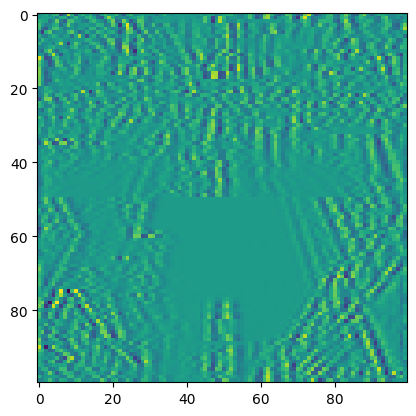

In [49]:
# 오염된 이미지
plt.imshow(broken_image.view(100, 100))

In [50]:
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

# broken_image와 weird_function 이용해 복원해야함

In [51]:
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [52]:
random_tensor = torch.randn(10000, dtype = torch.float)

In [57]:
lr = 0.8

for i in range(0, 20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr * random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 0.13265779614448547
Loss at 1000 = 0.11492310464382172
Loss at 2000 = 0.09818700700998306
Loss at 3000 = 0.08217476308345795
Loss at 4000 = 0.06671225279569626
Loss at 5000 = 0.051678381860256195
Loss at 6000 = 0.03698824718594551
Loss at 7000 = 0.0225846990942955
Loss at 8000 = 0.021162154152989388
Loss at 9000 = 0.021166067570447922
Loss at 10000 = 0.021167144179344177
Loss at 11000 = 0.021167678758502007
Loss at 12000 = 0.021167883649468422
Loss at 13000 = 0.021168161183595657
Loss at 14000 = 0.021168114617466927
Loss at 15000 = 0.021168285980820656
Loss at 16000 = 0.021168125793337822
Loss at 17000 = 0.02116783708333969
Loss at 18000 = 0.021167710423469543
Loss at 19000 = 0.021167106926441193


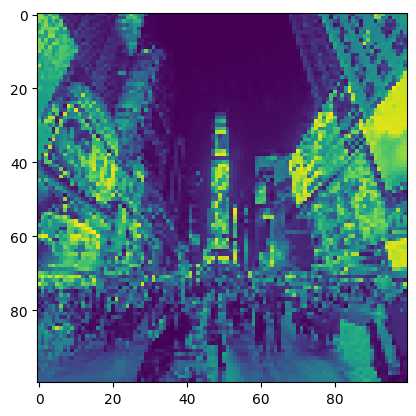

In [58]:
plt.imshow(random_tensor.view(100,100).data)

## 2-3. 신경망 모델 구현하기

In [59]:
import torch
import numpy as np
from sklearn.datasets import make_blobs # 새로운 데이터 생성(make.blobs)
import matplotlib.pyplot as plt

In [60]:
n_dim = 2
x_train, y_train = make_blobs(n_samples = 80, n_features = n_dim, centers = [[1,1],[-1,-1],[1,-1],[-1,1]], shuffle = True, cluster_std = 0.3)
x_test, y_test = make_blobs(n_samples = 20, n_features = n_dim, centers = [[1,1],[-1,-1],[1,-1],[-1,1]], shuffle = True, cluster_std = 0.3)

In [63]:
def label_map(y_, from_, to_):
    y = np.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

In [65]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

In [64]:
y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

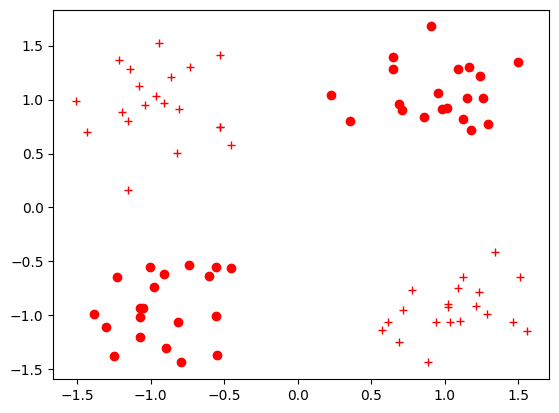

In [66]:
plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [67]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [69]:
# 신경망 모델 구현(torch.nn.Module 상속받아 만든 클래스임)
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size): # 입력값 사이즈와 얼마나 들어올 건지 ..
        super(NeuralNet, self).__init__() # 부모의 것을 수행
        self.input_size = input_size
        self.hidden_size = hidden_size

        # 사용할 레이어 정의
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, input_tensor): # input과 레이어 그리고 output 연결
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [70]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [71]:
model.eval()

NeuralNet(
  (linear_1): Linear(in_features=2, out_features=5, bias=True)
  (relu): ReLU()
  (linear_2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [73]:
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.7018150091171265


- 오차값이 0.73 이 나왔다.
- 이정도의 오차를 가진 모델은 사실상 분류하는 능력이 없다고 봐도 무방하다.
---
- 신경망을 학습시켜 성능 향상 시키기

In [ ]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.7012451887130737
Train loss at 100 is 0.6811745762825012
Train loss at 200 is 0.6583002805709839
Train loss at 300 is 0.6229817271232605
Train loss at 400 is 0.5797683000564575
Train loss at 500 is 0.5269871950149536
Train loss at 600 is 0.46062690019607544
Train loss at 700 is 0.3927570879459381
Train loss at 800 is 0.33098095655441284
Train loss at 900 is 0.2792123258113861
Train loss at 1000 is 0.23867054283618927
Train loss at 1100 is 0.206443190574646
Train loss at 1200 is 0.18159791827201843
Train loss at 1300 is 0.16304273903369904
Train loss at 1400 is 0.14859595894813538
Train loss at 1500 is 0.13715797662734985
Train loss at 1600 is 0.1278933733701706
Train loss at 1700 is 0.12029363960027695
Train loss at 1800 is 0.11399193853139877
Train loss at 1900 is 0.10869929939508438


In [ ]:
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.11248666048049927


- 학습을 하기 전과 비교했을때 현저하게 줄어든 오차값을 확인할 수 있다.
---
- 학습된 모델을 .pt 파일로 저장하기

In [ ]:
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 0.4623, -0.4615],
        [-1.6208,  1.6077],
        [ 0.0484,  0.0723],
        [ 1.7924, -1.7013],
        [ 0.8870, -0.8400]])), ('linear_1.bias', tensor([ 1.2365, -0.4272, -0.2208, -0.4245, -0.2120])), ('linear_2.weight', tensor([[-1.0194,  2.2454, -0.1382,  2.4390,  1.0011]])), ('linear_2.bias', tensor([-1.9389]))])


- `save()` 를 실행하고 나면 학습된 신경망의 가중치를 내포하는 model.pt 라는 파일이 생성된다.
- 아래 코드처럼 새로운 신경망 객체에 model.pt 속의 가중치값을 입력시키는 것 또한 가능하다.

In [ ]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9825764894485474
